# Figures of AU-emotion mappings project
Code to run the analyses that result in the data visualized here is stored in the `src/analysis` directory of this repository.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['font.sans-serif'] = "Arial"

## Figure 1: overview method
Made in google draw, but used the mapping matrix below:

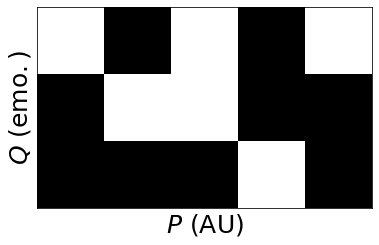

In [2]:
#AUs = ['AU1', 'AU2', 'AU4', 'AU5', 'AU6', 'AU7', 'AU9', 'AU10', 'AU11', 'AU12', 'AU13', 'AU14',
#       'AU15', 'AU16', 'AU17', 'AU20', 'AU22', 'AU23', 'AU24', 'AU25', 'AU26']
M_classes = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Surprise', 'Sadness']
#M_mapping = [
#    ['AU4', 'AU5', 'AU7', 'AU23'],
#    ['AU9', 'AU15', 'AU16'],
#    ['AU1', 'AU2', 'AU4', 'AU5', 'AU20', 'AU26'],
#    ['AU6', 'AU12'],
#    ['AU1', 'AU4', 'AU5'],
#    ['AU1', 'AU2', 'AU5', 'AU26']
#]
AUs = ['AU4', 'AU9', 'AU10', 'AU12', 'AU23']
M_mapping = [
    ['AU4', 'AU23', 'AU10'],
    ['AU9', 'AU10'],
    ['AU12']
]

M = [[1 if au in mapp else 0 for au in AUs]
     for mapp in M_mapping]
M = np.array(M)
plt.imshow(M, cmap='gray', aspect=1)
plt.xticks([])
plt.yticks([])
plt.ylabel(r'$Q\ \mathrm{(emo.)}$', fontsize=25)
plt.xlabel(r'$P\ \mathrm{(AU)}$', fontsize=25)
plt.show()

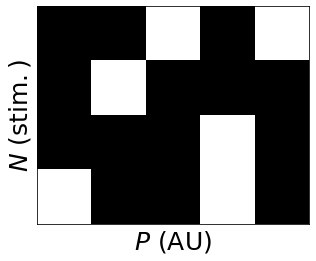

In [3]:
#S_ = [
#    ['AU1', 'AU8', 'AU9'],
#    ['AU6', 'AU26'],
#    ['AU4', 'AU25']   # TO CHANGE!
#]
S_ = [
    ['AU10', 'AU23'],
    ['AU9'],
    ['AU12'],
    ['AU4', 'AU12']
]

S = [[1 if au in stim else 0 for au in AUs]
      for stim in S_]
E = [0, 1, 2, 1]
E = np.array([e == np.arange(3) for e in E]).astype(int)
S = np.array(S)
plt.imshow(S, cmap='gray', aspect=1)
plt.xticks([])
plt.yticks([])
plt.ylabel(r'$N\ \mathrm{(stim.)}$', fontsize=25)
plt.xlabel(r'$P\ \mathrm{(AU)}$', fontsize=25)
plt.show()

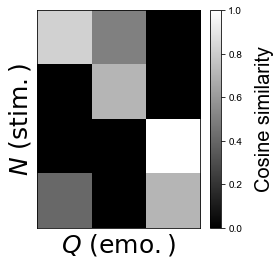

In [4]:
norm = np.sqrt((S ** 2).sum(axis=1, keepdims=True) @ (M.T ** 2).sum(axis=0, keepdims=True)) 
ϕ = (S @ M.T) / norm

# Alternatively, using scikit-learn:
# from sklearn.metrics.pairwise import cosine_similarity
# cosine_similarity(S, M)

im = plt.imshow(ϕ, cmap='gray', aspect=1)
plt.xticks([])
plt.yticks([])
plt.colorbar(im,fraction=0.05, pad=0.03)
plt.text(3.5, 1.5, 'Cosine similarity', rotation=90, va='center', fontsize=20)
plt.ylabel(r'$N\ \mathrm{(stim.)}$', fontsize=25)
plt.xlabel(r'$Q\ \mathrm{(emo.)}$', fontsize=25)
plt.show()

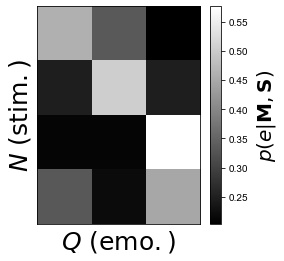

In [5]:
def softmax_2d(arr, beta):
    """ Vectorized softmax implementation including an inverse temperature
    parameter (beta). It assumes a 2D array with stimuli x features (similarities). """
    scaled = beta * arr
    num = np.exp(scaled - scaled.max(axis=1, keepdims=True))
    denom = np.sum(num, axis=1, keepdims=True)
    return num / denom

pE = softmax_2d(ϕ, 1)
im = plt.imshow(pE, cmap='gray', aspect=1)
plt.xticks([])
plt.yticks([])
plt.colorbar(im,fraction=0.05, pad=0.03)
plt.text(3.5, 1.5, r'$p(e | \mathbf{M}, \mathbf{S})$', rotation=90, va='center', fontsize=20)
plt.ylabel(r'$N\ \mathrm{(stim.)}$', fontsize=25)
plt.xlabel(r'$Q\ \mathrm{(emo.)}$', fontsize=25)
plt.show()

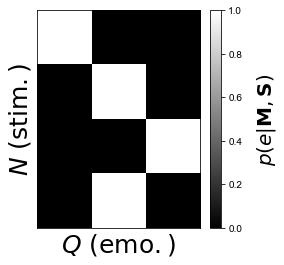

In [6]:
im = plt.imshow(E, cmap='gray', aspect=1)
plt.xticks([])
plt.yticks([])
plt.colorbar(im,fraction=0.05, pad=0.03)
plt.text(3.5, 1.5, r'$p(e | \mathbf{M}, \mathbf{S})$', rotation=90, va='center', fontsize=20)
plt.ylabel(r'$N\ \mathrm{(stim.)}$', fontsize=25)
plt.xlabel(r'$Q\ \mathrm{(emo.)}$', fontsize=25)
plt.show()

In [7]:
print(pE.round(2))
print(E)

[[0.46 0.34 0.2 ]
 [0.25 0.5  0.25]
 [0.21 0.21 0.58]
 [0.33 0.22 0.45]]
[[1 0 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]]


[Text(0, 0, ''), Text(1, 0, ''), Text(2, 0, '')]

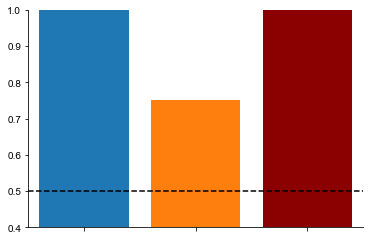

In [8]:
from sklearn.metrics import roc_auc_score
#mask = E.sum(axis=0) != 0
#roc_auc_score(E[:, mask], softmax_2d(ϕ[:, mask], 1))
score = roc_auc_score(E, pE, average=None)

plt.bar([0, 1, 2], score, color=['tab:blue', 'tab:orange', 'darkred'])
sns.despine()
plt.xlim(-0.5, 2.5)
plt.ylim(0.4, 1)
plt.axhline(0.5, ls='--', c='k')
plt.xticks([0, 1, 2])
plt.gca().set_xticklabels([])

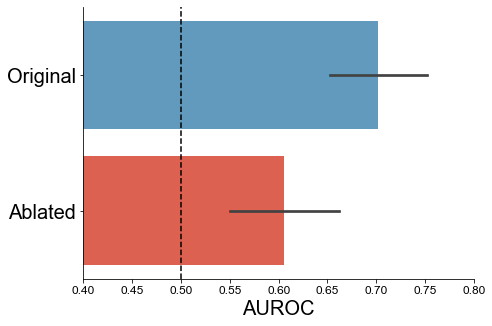

In [9]:
orig = np.random.normal(0.7, 0.05, size=60)
abl = np.random.normal(0.6, 0.05, size=60)
tpe = np.repeat([0, 1], 60)
data = pd.DataFrame(np.c_[np.concatenate((orig, abl)), tpe], columns=['score', 'tpe'])
colors = {0: sns.color_palette('Blues')[3], 1: sns.color_palette('Reds')[3]}

fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.barplot(y='tpe', x='score', data=data, orient='h', ci='sd', palette=colors, ax=ax)
ax.set_yticklabels(['Original', 'Ablated'], fontsize=20)
ax.set_ylabel('')
ax.set_xlabel('AUROC', fontsize=20)
ax.set_xlim(0.4, 0.8)
ax.tick_params(which='major', axis='x', labelsize=12)
ax.axvline(0.5, ls='--', c='k')
sns.despine()

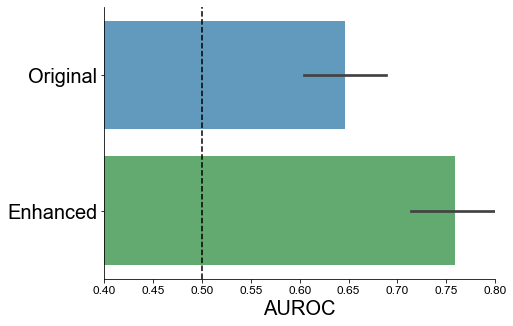

In [10]:
orig = np.random.normal(0.65, 0.05, size=60)
app = np.random.normal(0.75, 0.05, size=60)
tpe = np.repeat([0, 1], 60)
data = pd.DataFrame(np.c_[np.concatenate((orig, app)), tpe], columns=['score', 'tpe'])
colors = {0: sns.color_palette('Blues')[3], 1: sns.color_palette('Greens')[3]}

fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.barplot(y='tpe', x='score', data=data, orient='h', ci='sd', palette=colors, ax=ax)
ax.set_yticklabels(['Original', 'Enhanced'], fontsize=20)
ax.set_ylabel('')
ax.set_xlabel('AUROC', fontsize=20)
ax.set_xlim(0.4, 0.8)
ax.tick_params(which='major', axis='x', labelsize=12)
ax.axvline(0.5, ls='--', c='k')
sns.despine()

## Figure 2: noise ceiling explanation
Made in google draw.

## Figure 3: main results plot

In [24]:
# SOME PREPROCESSING STUF FOR THE MAIN FIGURE
map2leg = {
    'Darwin': 'Darwin\n(1886)',
    'Matsumoto2008': 'Matsumoto et al.\n(2008)',
    'Keltner2019': 'Keltner et al.\n(2019)',
    'Cordaro2018ref': 'Cordaro et al.\n(2018; ref.)',
    'Cordaro2018IPC': 'Cordaro et al.\n(2018; ICP)',
    'Ekman': 'EMFACS',
    'JS': 'Jack &\nSchyns'
}

map2leg2 = {
    'Darwin': 'Darwin',
    'Matsumoto2008': 'Matsumoto',
    'Keltner2019': 'Keltner',
    'Cordaro2018ref': 'Cordaro (ref.)',
    'Cordaro2018IPC': 'Cordaro (ICP)',
    'Ekman': 'EMFACS',
    'JS': 'Jack & Schyns'
}

files = [
    '../data/Darwin.tsv',
    '../data/Matsumoto2008.tsv',
    '../data/Keltner2019.tsv',
    '../data/Cordaro2018ref.tsv',
    '../data/Cordaro2018IPC.tsv',
    '../data/Ekman.tsv'
]
m_dfs = [pd.read_csv(f, sep='\t', index_col=0) for f in files]
map_names = list(map2leg.values())
emo_names = ['anger', 'disgust', 'fear', 'happy', 'sadness', 'surprise']
au_names = np.loadtxt('../data/au_names_new.txt', dtype=str)

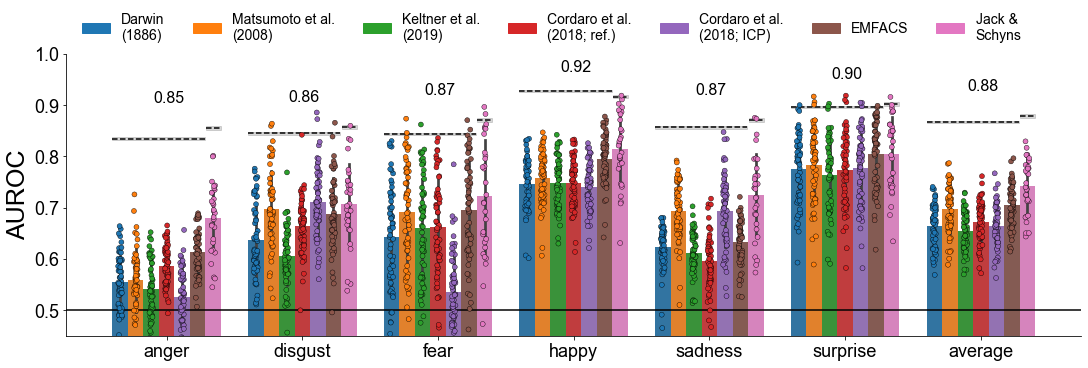

In [28]:
ymin = 0.45
ymax = 1
chance_level = .5

df = pd.read_csv('../results/scores.tsv', sep='\t', index_col=0)
df = df.replace(map2leg)
df_av = df.groupby(['mapping', 'sub']).mean().reset_index()

df_av = df.groupby(['mapping', 'sub']).mean().reset_index()
df = pd.concat([df, df_av.assign(emotion='average')], axis=0)

nc = pd.read_csv('../results/noise_ceiling.tsv', sep='\t', index_col=0)
nc_js = pd.read_csv('../results/noise_ceiling_test.tsv', sep='\t', index_col=0)

fig, ax = plt.subplots(figsize=(15, 5), constrained_layout=True)
ax = sns.barplot(x='emotion', y='score', data=df, hue='mapping',
                 ax=ax, ci='sd')

ax = sns.stripplot(x='emotion', y='score', hue='mapping',
                   edgecolor='black', linewidth=0.4, data=df,
                   dodge=True, jitter=True)

ax.set_xlabel('')
ax.set_ylabel('AUROC', fontsize=25)

n_tk = df['mapping'].unique().size
for i in range(6):
    this_nc = np.array([nc['noise_ceiling'].iloc[i]] * 6)
    this_sd = np.array([nc['sd'].iloc[i]] * 6)
    plt.plot(np.linspace(i-0.4, i+0.28, num=6), this_nc, c='k', ls='--')
    plt.fill_between(
        np.linspace(i-0.4, i+0.28, num=6),
        this_nc - this_sd, this_nc + this_sd,
        color='gray', alpha=0.3
    )
    this_nc = nc_js['noise_ceiling'][i]
    this_sd = nc_js['sd'][i]
    plt.plot([i+0.29, i+0.40], [this_nc, this_nc], c='k', ls='--')
    plt.fill_between(
        [i+0.29, i+0.40],
        this_nc - this_sd, this_nc + this_sd,
        color='gray', alpha=0.3
    )
    plt.text(i - 0.1, this_nc + 0.05, f'{this_nc:.2f}', fontsize=16)

i += 1
this_nc = np.array([nc['noise_ceiling'].mean()] * 6)
this_sd = np.array([nc['sd'].mean()] * 6)
plt.plot(np.linspace(i-0.4, i+0.28, num=6), this_nc, c='k', ls='--')
plt.fill_between(
    np.linspace(i-0.4, i+0.28, num=6),
    this_nc - this_sd, this_nc + this_sd,
    color='gray', alpha=0.3
)
this_nc = nc_js['noise_ceiling'].mean()
this_sd = nc_js['sd'].mean()
plt.plot([i+0.29, i+0.40], [this_nc, this_nc], c='k', ls='--')
plt.fill_between(
    [i+0.29, i+0.40],
    this_nc - this_sd, this_nc + this_sd,
    color='gray', alpha=0.3
)
plt.text(i - 0.1, this_nc + 0.05, f'{this_nc:.2f}', fontsize=16)
    

ax.set_facecolor('white')
ax.set_ylim(ymin, ymax)
ax.axhline(chance_level, c='k', ls='-')
ax.legend_.remove()
colors = {mapp: sns.color_palette()[i] for i, mapp in enumerate(map_names)}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, ncol=7, loc=(0.01, 1.02), frameon=False, fontsize=14)

ax.tick_params(axis='y', labelsize=18)
ax.tick_params(axis='x', labelsize=18)
sns.despine()
plt.savefig('figure_2.png', bbox_inches='tight', dpi=200, facecolor='white')

## Explanation figure

In [29]:
from glob import glob
mappings = pd.concat([pd.read_csv(f, sep='\t', index_col=0).assign(mapp=f.split('/')[-1].split(".")[0])
                      for f in glob('../data/*.tsv')])

mappings = mappings.reset_index().groupby(['mapp', 'index']).max().reset_index().set_index('index')

df_abl = pd.read_csv('../results/scores_ablation.tsv', sep='\t', index_col=0)
df_abl = df_abl.replace(map2leg).drop(['sub', 'beta', 'kernel'], axis=1)
heatmap_abl = pd.DataFrame(np.zeros((6, 33)), columns=au_names, index=emo_names)
for emo in emo_names:
    this_df = df_abl.query("score != 0 & ablated_from == @emo & emotion == @emo")
    this_df = this_df.groupby('ablated_au').mean().reset_index()
    for _, row in this_df.iterrows():
        heatmap_abl.loc[emo, row['ablated_au']] = row['score']

heatmap_abl[heatmap_abl == 0] = np.nan

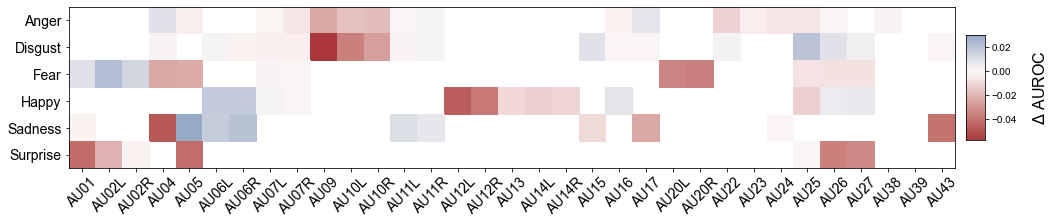

In [30]:
fig, ax = plt.subplots(figsize=(16, 3), constrained_layout=True)
ax = sns.heatmap(heatmap_abl, square=True, ax=ax, cmap='vlag_r', center=0, cbar_kws={'aspect': 30, 'shrink': 0.65, 'pad': 0.001, })
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, rotation=45);
ax.set_yticklabels([s.capitalize() for s in emo_names], fontsize=14)
ax.figure.axes[-1].set_ylabel(r'$\Delta$ AUROC', size=16, labelpad=15)
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.figure.axes[-1].set_frame_on(True)
#ax.text(33.5, 0.5, 'Improve when ablated')
fig.savefig('figure_3.png', dpi=200)

In [31]:
df_abl = pd.read_csv('../results/scores_ablation.tsv', sep='\t', index_col=0)
emo = 'anger'
mapps = df_abl.query("emotion == @emo & ablated_from == @emo & ablated_au == 'AU22' & score != 0").mapping.unique()

for mapp in mapps:
    print(map2leg2[mapp].replace('\n', ' '), end=', ')

Matsumoto, EMFACS, Jack & Schyns, 

## Optimal model

In [32]:
ymin = -0.1
ymax = 0.4
chance_level = 0

df_o = pd.read_csv('../results/scores_optimal.tsv', sep='\t', index_col=0)
df_o = df_o.replace(map2leg)

df_av = df_o.groupby(['mapping', 'sub']).mean().reset_index()
df_o = pd.concat([df_o, df_av.assign(emotion='average')], axis=0)


#opt = df.groupby(['emotion', 'mapping']).mean()['score'] + df_o.groupby(['emotion', 'mapping']).mean()['score']
av_orig = df.groupby(['emotion', 'mapping']).mean()['score']

nc = pd.read_csv('../results/noise_ceiling.tsv', sep='\t', index_col=0)
nc_js = pd.read_csv('../results/noise_ceiling_test.tsv', sep='\t', index_col=0)

# CM stuff
cm_df = pd.read_csv('../results/cm_optimal.tsv', sep='\t', index_col=0)#.reset_index()
cm_df = cm_df.replace(map2leg)
#fig, axes = plt.subplots(ncols=7, nrows=2, figsize=(18, 6), sharey=True, sharex=True)
emo_reorder = ['anger', 'disgust', 'fear', 'surprise', 'happy', 'sadness']
emo_short = ['An', 'Di', 'Fe', 'Su', 'Ha', 'Sa']

In [33]:
#df.groupby('mapping').mean()['score'].loc[list(map2leg.values()), :]


<ipython-input-35-a8507737d5d1>:86: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar_ax.set_yticklabels(cbar_ax.get_yticklabels(), size=12)


Text(0.4, -0.4, 'Optimal')

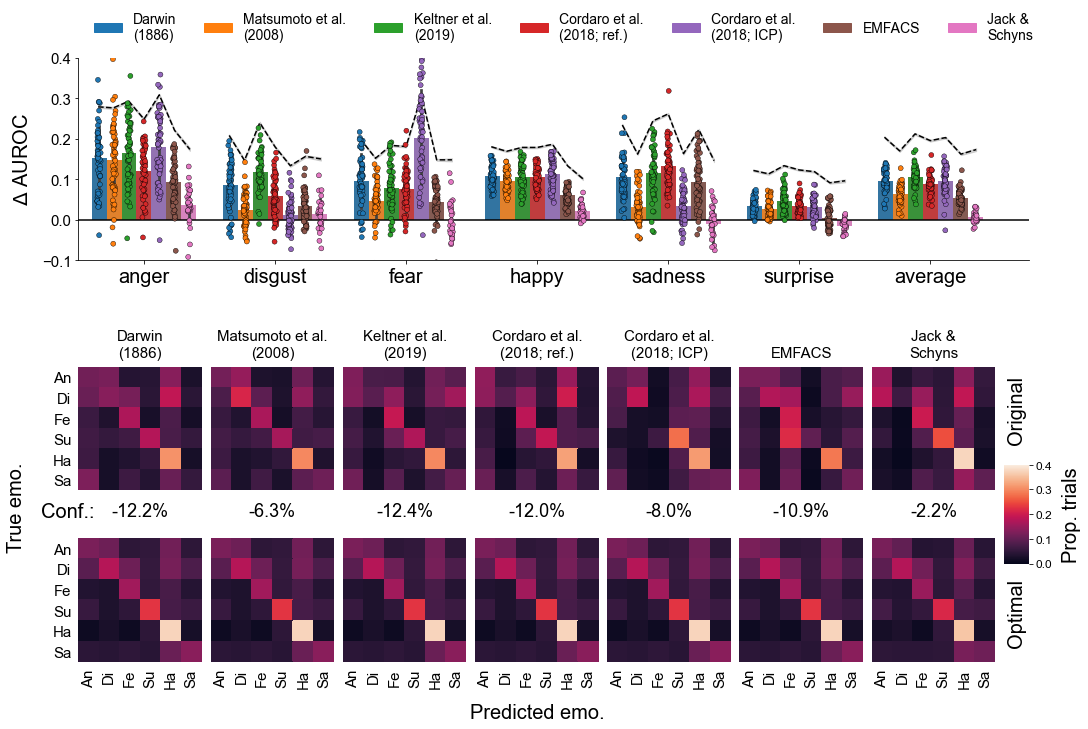

In [35]:
fig = plt.figure(figsize=(15, 10), constrained_layout=True)
gs = fig.add_gridspec(3, 8, height_ratios=[3, 2, 2], width_ratios=[1, 1, 1, 1, 1, 1, 1, 0.2])

ax1 = fig.add_subplot(gs[0, :])
ax1 = sns.barplot(x='emotion', y='score', data=df_o, hue='mapping',
                 ax=ax1, ci='sd')

ax1 = sns.stripplot(x='emotion', y='score', hue='mapping', ax=ax1,
                    edgecolor='black', linewidth=0.4, data=df_o,
                    dodge=True, jitter=True)

# hack to add whitespace between row 1 and 2
ax1.set_xlabel('bla', labelpad=25)
ax1.xaxis.label.set_color('white')
            
ax1.set_ylabel(r'$\Delta$ AUROC', fontsize=20, labelpad=10)
mapps = df['mapping'].unique().size
for i in range(6): 
    orig = av_orig.reset_index().query(f"emotion == '{emo_names[i]}'").set_index('mapping').loc[df['mapping'].unique(), :]
    orig = orig['score'].to_numpy()
    this_nc = np.array([nc['noise_ceiling'].iloc[i]] * 6)
    this_nc = np.append(this_nc, nc_js['noise_ceiling'][i])
    this_sd = np.array([nc['sd'].iloc[i]] * 6)
    this_sd = np.append(this_sd, nc_js['sd'][i])
    this_nc = this_nc - orig
    ax1.plot(np.linspace(i - 0.35, i + 0.35, num=7), this_nc, ls='--', c='k')
    ax1.fill_between(
        np.linspace(i-0.35, i+0.35, num=7),
        this_nc - this_sd, this_nc + this_sd,
        color='gray', alpha=0.3
    )

i += 1
this_nc = nc['noise_ceiling'].mean()
tmp = df.groupby('mapping').mean()['score'].loc[list(map2leg.values())].to_numpy()[:6]
this_nc = this_nc - tmp
this_nc = np.append(this_nc, nc_js['noise_ceiling'].mean())
this_nc[-1] = this_nc[-1] - tmp[-1]

ax1.plot(np.linspace(i - 0.35, i + 0.35, num=7), this_nc, ls='--', c='k')
this_sd = np.array([nc['sd'].mean()] * 6)
this_sd = np.append(this_sd, nc_js['sd'].mean())

ax1.fill_between(
    np.linspace(i-0.35, i+0.35, num=7),
    this_nc - this_sd, this_nc + this_sd,
    color='gray', alpha=0.3
)

ax1.set_facecolor('white')
ax1.set_ylim(ymin, ymax)
ax1.axhline(chance_level, c='k', ls='-')
ax1.legend_.remove()
colors = {mapp: sns.color_palette()[i] for i, mapp in enumerate(map_names)}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
ax1.legend(handles, labels, ncol=7, loc=(0.01, 1.05), frameon=False, fontsize=14)

ax1.tick_params(axis='y', labelsize=15)
ax1.tick_params(axis='x', labelsize=20)
ax1.set_xlim(-0.5, 6.75)
sns.despine()

# CM PLOTS
axes = [[fig.add_subplot(gs[ii, i]) for i in range(7)] for ii in range(1, 3)]
cbar_ax = fig.add_subplot(gs[1:, 7])
I = np.eye(6)
for i, mapp in enumerate(cm_df['mapping'].unique()):
    bg = np.zeros(2)
    for ii, tpe in enumerate(['orig', 'opt']):
        cm = cm_df.query("mapping == @mapp & type == @tpe").drop(['mapping', 'type'], axis=1)
        cm = cm.loc[emo_reorder, emo_reorder].to_numpy()
        bg[ii] = (cm[np.triu_indices_from(cm, k=1)].sum() + cm[np.tril_indices_from(cm, k=-1)].sum()) / 30

        cm /= cm.sum(axis=1)
        
        xtl = emo_short if ii == 1 else False
        ytl = emo_short if i == 0 else False
        cbar = True if i == 6 and ii == 0 else False
        axes[ii][i] = sns.heatmap(
            cm, ax=axes[ii][i], vmin=0, vmax=0.8, square=True, cbar=cbar,
            xticklabels=xtl, yticklabels=ytl, cbar_ax=cbar_ax
        )
        if cbar:
            cbar_ax.set_ylabel('Prop. trials', size=20, labelpad=10)
            cbar_ax.set_yticklabels(cbar_ax.get_yticklabels(), size=12)
            cbar_ax.set_box_aspect(4)
        
        if ii == 0:
            axes[ii][i].set_title(mapp, fontsize=15, pad=10)
        
        if ii == 1:
            axes[ii][i].set_xticklabels(axes[ii][i].get_xticklabels(), rotation=90, fontsize=15)

        if i == 0:
            axes[ii][i].set_yticklabels(axes[ii][i].get_yticklabels(), rotation=0, fontsize=15)

        axes[ii][i].tick_params(axis='x', which='both', bottom=False)
        axes[ii][i].tick_params(axis='y', which='both', left=False)
        #bg[ii] = 1 - (np.sum((cm - I) ** 2) / np.sum((1 - I) ** 2))
    
    delta_bg = (bg[1] - bg[0]) / bg[0] * 100
    axes[1][i].text(3, -1.3, f"{delta_bg:.1f}%", ha='center', va='center', fontsize=18)

axes[1][0].set_ylabel('True emo.', fontsize=20, ha='center', va='center')
axes[1][0].yaxis.set_label_coords(-0.5, 1.25)
axes[1][3].set_xlabel('Predicted emo.', fontsize=20, labelpad=15)
axes[1][0].text(-0.5, -1.3, 'Conf.:', fontsize=20, ha='center', va='center')
cbar_ax.text(0.4, 1.25, 'Original', fontsize=20, ha='center', va='center', rotation=90)
cbar_ax.text(0.4, -0.4, 'Optimal', fontsize=20, ha='center', va='center', rotation=90)

Difference noise ceiling and optimal model:

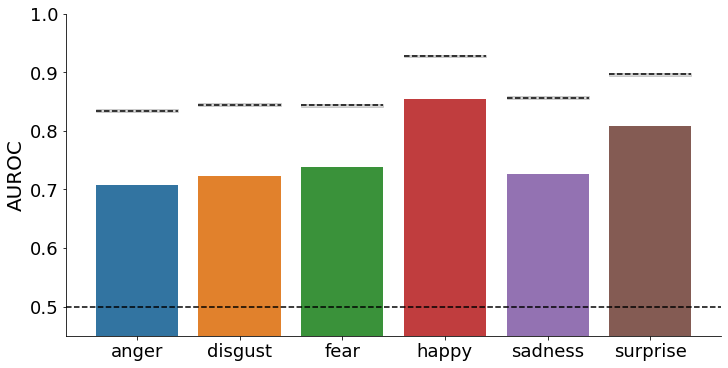

In [22]:
opt = (df.groupby(['emotion', 'sub']).mean()['score'] + df_o.groupby(['emotion', 'sub']).mean()['score']).reset_index()

fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)
sns.barplot(x='emotion', y='score', data=opt,
            ax=ax, ci=None)
ax.set_ylim(0.45, 1.)
ax.tick_params(axis='y', labelsize=18)
ax.tick_params(axis='x', labelsize=18)
sns.despine()
ax.set_xlabel('')
ax.set_ylabel('AUROC', fontsize=20)
ax.axhline(0.5, ls='--', c='k')
for i in range(6):
    this_nc = np.array([nc['noise_ceiling'].iloc[i]] * 7)
    this_sd = np.array([nc['sd'].iloc[i]] * 7)
    plt.plot(np.linspace(i-0.4, i+0.4, num=7), this_nc, c='k', ls='--')
    plt.fill_between(
        np.linspace(i-0.4, i+0.4, num=7),
        this_nc - this_sd, this_nc + this_sd,
        color='gray', alpha=0.3
    )

In [174]:
(1 - nc['noise_ceiling']) / 0.5

0    0.331427
1    0.310341
2    0.313035
3    0.144866
4    0.286778
5    0.206345
Name: noise_ceiling, dtype: float64

In [172]:
diff = nc['noise_ceiling'].to_numpy() - opt.groupby('emotion').mean()['score']
diff / 0.5

emotion
anger       0.252461
disgust     0.243725
fear        0.209939
happy       0.147786
sadness     0.259145
surprise    0.176532
Name: score, dtype: float64

In [173]:
((av_orig + df_o.groupby(['emotion', 'mapping']).mean()['score']).reset_index().groupby('emotion').mean()['score']  - 0.5)/0.5

emotion
anger       0.416767
disgust     0.444968
fear        0.473249
happy       0.704442
sadness     0.450751
surprise    0.612826
Name: score, dtype: float64

In [32]:
from scipy.linalg import toeplitz
phi = 0.99
X = phi ** toeplitz(range(6))
I = np.eye(6)
1 - (np.sum((X - I) ** 2) / np.sum((1 - I) ** 2))

0.04552026986215718

# Supplementary materials/results/figures

## Probabilistic predictions vs. discrete predictions

In [ ]:
pp_df = pd.read_csv('../results/prob_vs_discrete_scores.tsv', sep='\t', index_col=0)
pp_df = pp_df.replace(map2leg)

g = sns.catplot(x='mapping', y='score', data=pp_df, hue='method',
                kind="bar", aspect=3, height=5, ci='sd')
ax = g.axes[0, 0]
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15, rotation=20)
ax.set_xlabel('')
ax.set_ylabel('Score', fontsize=20)
ax.set_ylim(0.4, 1)
ax.axhline(0.5, ls='--', c='k')
leg = g._legend
leg.set_title('')
leg.get_texts()[0].set_text('discrete')
leg.get_texts()[0].set_fontsize(20)
leg.get_texts()[1].set_text('probabilistic')
leg.get_texts()[1].set_fontsize(20)
leg.set_bbox_to_anchor([0, 0, 0.2, 1.75])
plt.gcf().savefig('figure_S1.png', dpi=200, bbox_inches='tight')

## Hyperparameter figure (Figure S2 & S3)

In [ ]:
nc = pd.read_csv('../results/noise_ceiling.tsv', sep='\t', index_col=0)
nc_js = pd.read_csv('../results/noise_ceiling_test.tsv', sep='\t', index_col=0)

hp_df = pd.read_csv('../results/scores_hyperparameters.tsv', sep='\t', index_col=0)
KERNEL = 'cosine'
g = sns.catplot(x='emotion', y='score', data=hp_df.query("kernel == @KERNEL"), hue='beta', row='mapping',
                kind="bar", aspect=4, height=3, ci='sd')

g._legend.set_title(r'$\beta$')
plt.setp(g._legend.get_title(), fontsize=16)
plt.setp(g._legend.get_texts(), fontsize=16)
for i, ax in enumerate(g.axes.flatten()):
    ax.text(-.6, 1, map_names[i], fontsize=20, verticalalignment='top')
    ax.set_title('')
    
    if map_names[i] == 'Jack & Schyns':
        nc2use = nc_js
    else:
        nc2use = nc
    
    for ii, emo in enumerate(nc['emotion'].unique()):
        this_nc = nc2use.loc[nc2use['emotion'] == emo, 'noise_ceiling']
        this_sd = nc2use.loc[nc2use['emotion'] == emo, 'sd']
        ax.plot(np.linspace(ii-0.4, ii+0.4, num=5), [this_nc]*5, c='k', ls='-.')
        ax.fill_between(
            np.linspace(ii-0.4, ii+0.4, num=5),
            this_nc - this_sd, this_nc + this_sd,
            color='gray', alpha=0.3
        )
        ax.set_ylim(ymin, ymax)
        ax.axhline(0.5, ls='--', c='k')
        ax.set_ylabel("AUROC", fontsize=20)

g.set_xlabels('')
g.set_xticklabels(df['emotion'].unique(), fontsize=20)

g._legend.set_bbox_to_anchor([1.05, 0.925])
plt.subplots_adjust(hspace=0.2)
fig = plt.gcf()
fig.tight_layout()
fig.savefig('figure_S2.png', dpi=200, bbox_inches='tight')

In [ ]:
hp_df = pd.read_csv('../results/scores_hyperparameters.tsv', sep='\t', index_col=0)
BETA = 1

g = sns.catplot(x='emotion', y='score', data=hp_df.query("beta == @BETA"), hue='kernel', row='mapping',
                kind="bar", aspect=4, height=3, ci='sd')

g._legend.set_title('Kernel')
plt.setp(g._legend.get_title(), fontsize=16)
plt.setp(g._legend.get_texts(), fontsize=16)

for i, ax in enumerate(g.axes.flatten()):
    ax.text(-.6, 1, map_names[i], fontsize=20, verticalalignment='top')
    ax.set_title('')

    if map_names[i] == 'Jack & Schyns':
        nc2use = nc_js
    else:
        nc2use = nc

    for ii, emo in enumerate(nc['emotion'].unique()):
        this_nc = nc2use.loc[nc2use['emotion'] == emo, 'noise_ceiling']
        this_sd = nc2use.loc[nc2use['emotion'] == emo, 'sd']
        ax.plot(np.linspace(ii-0.4, ii+0.4, num=5), [this_nc]*5, c='k', ls='-.')
        ax.fill_between(
            np.linspace(ii-0.4, ii+0.4, num=5),
            this_nc - this_sd, this_nc + this_sd,
            color='gray', alpha=0.3
        )
        ax.set_ylim(ymin, ymax)
        ax.axhline(0.5, ls='--', c='k')
        ax.set_ylabel("AUROC", fontsize=20)

g.set_xlabels('')
g.set_xticklabels(df['emotion'].unique(), fontsize=20)

g._legend.set_bbox_to_anchor([1.075, 0.925])

plt.subplots_adjust(hspace=0.2)
fig = plt.gcf()
fig.tight_layout();
fig.savefig('figure_S3.png', dpi=200, bbox_inches='tight')

## Bias simulations (Supplementary Figure S4)

In [ ]:
df_naus = pd.read_csv('../results/scores_bias_simulation_n_aus.tsv', sep='\t', index_col=0)
df_naus = df_naus.groupby(['mapping', 'n_aus', 'emotion']).mean().reset_index()

df_nconf = pd.read_csv('../results/scores_bias_simulation_n_configs.tsv', sep='\t', index_col=0)
df_nconf = df_nconf.groupby(['mapping', 'n_configs', 'emotion']).mean().reset_index()

fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(12, 5))
sns.barplot(x='n_aus', y='score', data=df_naus, ci='sd', ax=axes[0])
sns.barplot(x='n_configs', y='score', data=df_nconf, ci='sd', ax=axes[1])
sns.despine()
axes[0].set_ylim(0.2, 0.8)
for ax in axes:
    ax.axhline(0.5, ls='--', c='k')

axes[0].set_ylabel('AUROC', fontsize=20)
axes[1].set_ylabel('')
axes[0].set_xlabel('Number of AUs per config', fontsize=20)
axes[1].set_xlabel('Number of configs per class', fontsize=20)

axes[0].text(-0.9, 0.85, 'A', fontsize=35)
axes[1].text(-0.9, 0.85, 'B', fontsize=35)

fig.tight_layout()
fig.savefig('figure_S4.png', dpi=200)

In [ ]:
from scipy.stats import ttest_1samp
for emo in df_naus.emotion.unique():
    for n_au in df_naus.n_aus.unique():
        tmp_df = df_naus.query("emotion == @emo & n_aus == @n_au")
        print(ttest_1samp(tmp_df.score, 0.5))

## Ablation analysis (Supplementary Figure 5)

In [ ]:
df_abl = pd.read_csv('../results/scores_ablation.tsv', sep='\t', index_col=0)
df_abl = df_abl.replace(map2leg).drop(['sub', 'beta', 'kernel'], axis=1)

In [ ]:
fig, axes = plt.subplots(nrows=6, figsize=(20, 12), sharey=True, sharex=False,
                         constrained_layout=True)
for i, emo in enumerate(emo_names):
    this_df = df_abl.query("ablated_from == @emo & emotion == @emo")
    axes[i] = sns.barplot(x='ablated_au', y='score', data=this_df, hue='mapping',
                          ci=95, errwidth=1, ax=axes[i])
    if i != 0:
        axes[i].get_legend().remove()
    else:
        axes[i].legend(ncol=7, loc=(0.2, 1.05), frameon=False)

    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    axes[i].text(31, 0.04, emo.capitalize(), fontsize=20, ha='center', va='center')
    axes[i].axhline(0, ls='-', c='k', lw=0.25)

axes[i].set_ylim(-0.07, 0.05)
fig.text(-0.02, 0.5, r'$\Delta$ AUROC', va='center', ha='center',
         rotation='vertical', fontsize=30)
fig.text(0.5, -0.04, 'Ablated AU', va='center', ha='center', fontsize=30)

sns.despine()
fig.savefig('figure_S5.png', dpi=200, facecolor='white')

## Intensity-stratified analysis (supplementary figure 6)

In [ ]:
nc = pd.read_csv('../results/noise_ceiling_intensity_stratified.tsv', sep='\t', index_col=0)
nc_js = pd.read_csv('../results/noise_ceiling_intensity_stratified_test.tsv', sep='\t', index_col=0)

df_int = pd.read_csv('../results/scores_intensity_stratified.tsv', sep='\t', index_col=0)
df_int = df_int.replace(map2leg)
g = sns.catplot(x='emotion', y='score', data=df_int, hue='intensity', row='mapping',
                kind="bar", aspect=4, height=3, ci='sd')

g._legend.set_title(' intensity\n quantile')
plt.setp(g._legend.get_title(), fontsize=15)
plt.setp(g._legend.get_texts(), fontsize=15)
for i, ax in enumerate(g.axes.flatten()):
    ax.text(-.6, 1, map_names[i], fontsize=20, verticalalignment='top')
    ax.set_title('')
    if i != (len(g.axes) - 1):
        nc2use = nc.copy()
    else:
        nc2use = nc_js.copy()
        
    for ii, emo in enumerate(nc['emotion'].unique()):
        
        this_nc = nc2use.loc[nc['emotion'] == emo, 'noise_ceiling']
        this_sd = nc2use.loc[nc['emotion'] == emo, 'sd']
        ax.plot(np.linspace(ii-0.4, ii+0.4, num=4), this_nc, c='k', ls='-.')
        ax.fill_between(
            np.linspace(ii-0.4, ii+0.4, num=4),
            this_nc - this_sd, this_nc + this_sd,
            color='gray', alpha=0.3
        )
        ax.set_ylim(ymin, ymax)
        ax.axhline(0.5, ls='--', c='k')
        ax.set_ylabel("AUROC", fontsize=20)

g.set_xlabels('')
g.set_xticklabels(df['emotion'].unique(), fontsize=20)

g._legend.set_bbox_to_anchor([1.04, 0.925])
plt.subplots_adjust(hspace=0.2)
fig = plt.gcf()
fig.tight_layout()
fig.savefig('figure_S6.png', bbox_inches='tight')

## ML figure
Something extra.

In [ ]:
ml_df = pd.read_csv('../results/scores_ml.tsv', sep='\t', index_col=0)

g = sns.catplot(x='emotion', y='score', data=ml_df,
                kind="bar", aspect=3, height=5, ci='sd')

g = sns.stripplot(x='emotion', y='score', data=ml_df,
                  edgecolor='black', linewidth=0.4)

ax = plt.gca()
ax.axhline(0.5, ls='--', c='k')
ax.set_ylim(0.4, 1.)

nc = pd.read_csv('../results/noise_ceiling_half.tsv', sep='\t', index_col=0)
for i in range(6):
    this_nc = np.array([nc['noise_ceiling'].iloc[i]])
    this_sd = np.array([nc['sd'].iloc[i]])
    plt.plot(np.linspace(i-0.4, i+0.4, num=6), [this_nc]*6, c='k', ls='-.', lw=0.5)
    plt.fill_between(
        np.linspace(i-0.4, i+0.4, num=6),
        this_nc - this_sd, this_nc + this_sd,
        color='gray', alpha=0.3
    )

plt.xlabel('')
plt.ylabel('AUROC', fontsize=20)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), fontsize=20);